## Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

## Script

In [2]:
# setting path
path = r'C:\Users\faisa\Documents\May 2025 Instacart project analysis'

In [3]:
# importing merged and cleaned data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_all_merged.pkl'))

In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'department'],
      dtype='object')

#### The following data are PII data: First Name, Last Name

#### Creating Regions column based on the State Column

In [63]:
# creating Northeast region
df.loc[df['state'].isin([
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'
]), 'regions'] = 'Northeast'

In [64]:
# creating Midwest region
df.loc[df['state'].isin([ 'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas',
 'Minnesota', 'Iowa', 'Missouri'
]), 'regions'] = 'Midwest'

In [65]:
# Creating South region
df.loc[df['state'].isin([ 'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia',
'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'regions'] = 'South'

In [66]:
# Creating West Region
df.loc[df['state'].isin([ 'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon',
'California', 'Hawaii']), 'regions'] = 'West'

In [9]:
# Checking consistency of the regions
df['regions'].value_counts()

regions
South        10799821
West          8299211
Midwest       7602550
Northeast     5727503
Name: count, dtype: int64

In [10]:
df[['regions', 'prices']]

,regions,prices
0,South,9.0
1,South,12.5
2,South,4.4
3,South,4.7
4,South,1.0
...,...,...
32434207,Midwest,5.6
32434208,Midwest,5.9
32434209,Midwest,4.2
32434210,Midwest,4.9


In [11]:
# Assigning regions and prices column to df_spending
df_spending = df[['regions', 'prices']]

In [12]:
# Assigning sum of spending in each region to df_spending_sum
df_spending_sum = df.groupby('regions')['prices'].sum().reset_index()

In [17]:
df_spending_region = df_spending_sum.sort_values(by= 'prices', ascending = False)

Text(0.5, 1.0, 'Spending in different Regions')

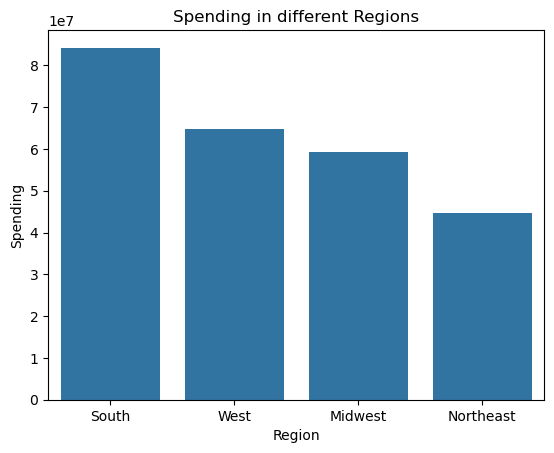

In [23]:
# creating a bar chart to analyse the differences in spending of each region.
bar_spending = sns.barplot(data = df_spending_region, x = 'regions', y = 'prices', estimator= 'sum')
plt.ylabel("Spending")
plt.xlabel("Region")
plt.title("Spending in different Regions")

In [24]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_spending.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

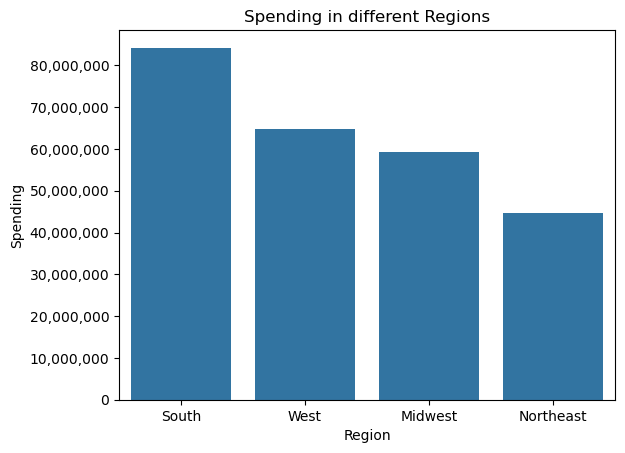

In [25]:
bar_spending.figure

In [26]:
# Exporting the chart
bar_spending.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'spending_region.png'), dpi=300, bbox_inches='tight')

#### As seen in the bar chart, South remains the biggest revenue stream for Instacart, West and midwest bringing almost the same amount of revenue and Northeast with almost half of what South brings.

In [18]:
# Creating a custom filter for customers that ordered more than 5 times.
df_active_customers = df[df['order_number']>5]

In [19]:
# exporting the active customers sample.
df_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

#### Spending Power and age

In [29]:
df_spending_power = df[['age', 'income']]

Text(0.5, 1.0, 'Spending Power: Age vs. Income')

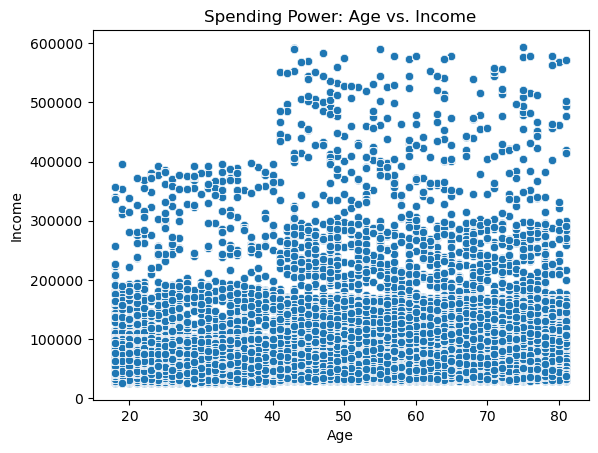

In [30]:
# Visualize spending power
scatter_spending_power = sns.scatterplot(data = df_spending_power,x = 'age', y = 'income')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Spending Power: Age vs. Income")

In [31]:
# Exporting the chart
scatter_spending_power.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'spending_power.png'), dpi=300, bbox_inches='tight')

### Profiling

#### 1 - Age Profile

In [163]:
# creating a profile for different age groups.
df.loc[df['age'] <=12, 'age_group'] = 'Children'

In [164]:
# creating a profile for age between 13 to 19 as teens
df.loc[(df['age'] >12) & (df['age']<=19), 'age_group'] = 'Teen'

In [165]:
# creating a profile for age between 20 to 39 as adult
df.loc[(df['age'] >19) & (df['age']<=39), 'age_group'] = 'Adult'

In [166]:
# creating a profile for age between 40 to 59 as Middle Age
df.loc[(df['age'] >39) & (df['age']<=59), 'age_group'] = 'Middle Age'

In [167]:
# creating a profile for age 60+ as Elderly
df.loc[df['age'] >59, 'age_group'] = 'Elderly'

In [168]:
# checking the frequency of the age groups
df['age_group'].value_counts()

age_group
Elderly       11075424
Middle Age    10181248
Adult         10151486
Teen           1020927
Name: count, dtype: int64

In [26]:
# Assigning age_group column to df_age_group
df_age_group = df[['age_group']]

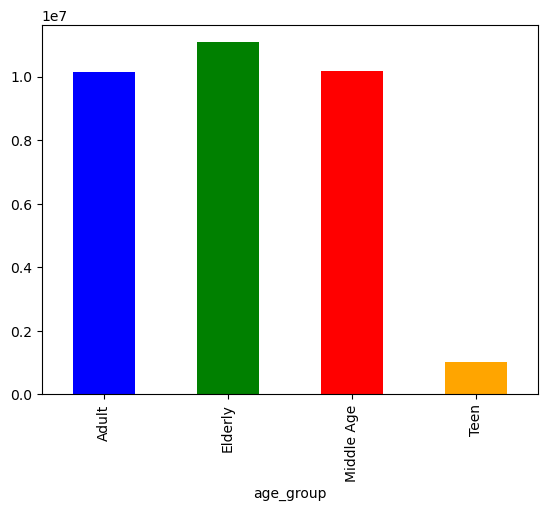

In [27]:
# Visualizing the different age groups.
age_group_bar = df_age_group['age_group'].value_counts().sort_index().plot.bar(color=['blue','green','red', 'orange'])

In [28]:
# removing the sceintific notation at the top to show actual numbers for better readability
age_group_bar.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

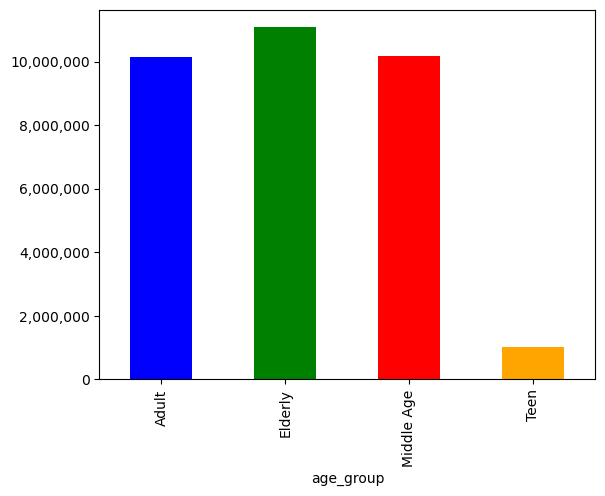

In [29]:
age_group_bar.figure

#### 2- Income Profile

In [169]:
# creating a new column for income category
df.loc[df['income']<50000, 'income_class'] = 'Low Class'

In [170]:
# creating middle class category
df.loc[(df['income']>=50000) & (df['income']<150000), 'income_class'] = 'Middle Class'

In [171]:
# creating upper middle class category
df.loc[(df['income']>=150000) & (df['income']<300000), 'income_class'] = 'Upper Middle Class'

In [172]:
# creating High class category
df.loc[df['income']>=300000, 'income_class'] = 'High Class'

In [173]:
df['income_class'].value_counts()

income_class
Middle Class          24779999
Upper Middle Class     3950575
Low Class              3597871
High Class              100640
Name: count, dtype: int64

In [35]:
# Assigning income_class column to a df_income_class
df_income_class = df[['income_class']]

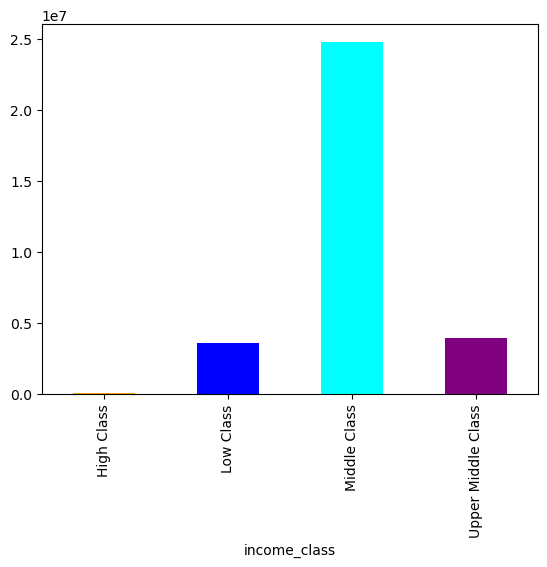

In [36]:
# Visualizing the income class
bar_income_class = df_income_class['income_class'].value_counts().sort_index().plot.bar(color=['orange','blue','cyan', 'purple'])

In [37]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_income_class.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

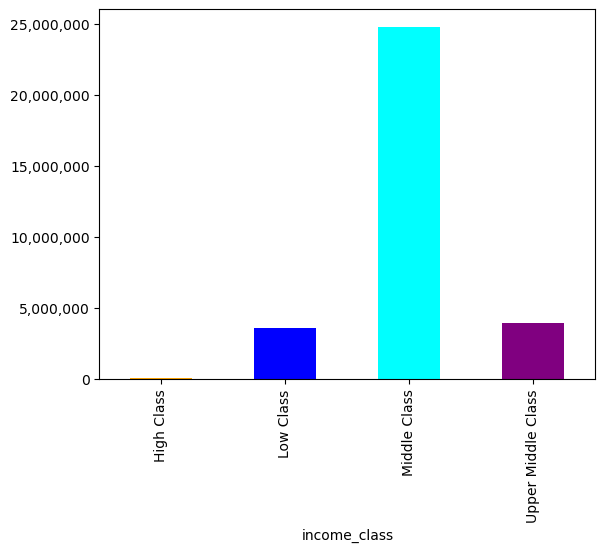

In [38]:
bar_income_class.figure

##### Income and spending behavior

In [135]:
# Creating a spending flag column
df['average_spending'] = df.groupby(['user_id'])['prices'].transform(np.mean)

C:\Users\faisa\AppData\Local\Temp\ipykernel_1764\3913901555.py:2: FutureWarning: The provided callable <function mean at 0x000002C8AB4ACEA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df['average_spending'] = df.groupby(['user_id'])['prices'].transform(np.mean)


In [136]:
# creating a new column 'spending' of each customer.
df.loc[df['average_spending']>=10, 'spending_flag'] = 'high spender'

In [137]:
df.loc[df['average_spending']<10, 'spending_flag'] = 'low spender'

In [148]:
df_income_spending = df[['income_class', 'spending_flag']]

In [151]:
df['spending_flag'].value_counts()

spending_flag
low spender     32308374
high spender      120711
Name: count, dtype: int64

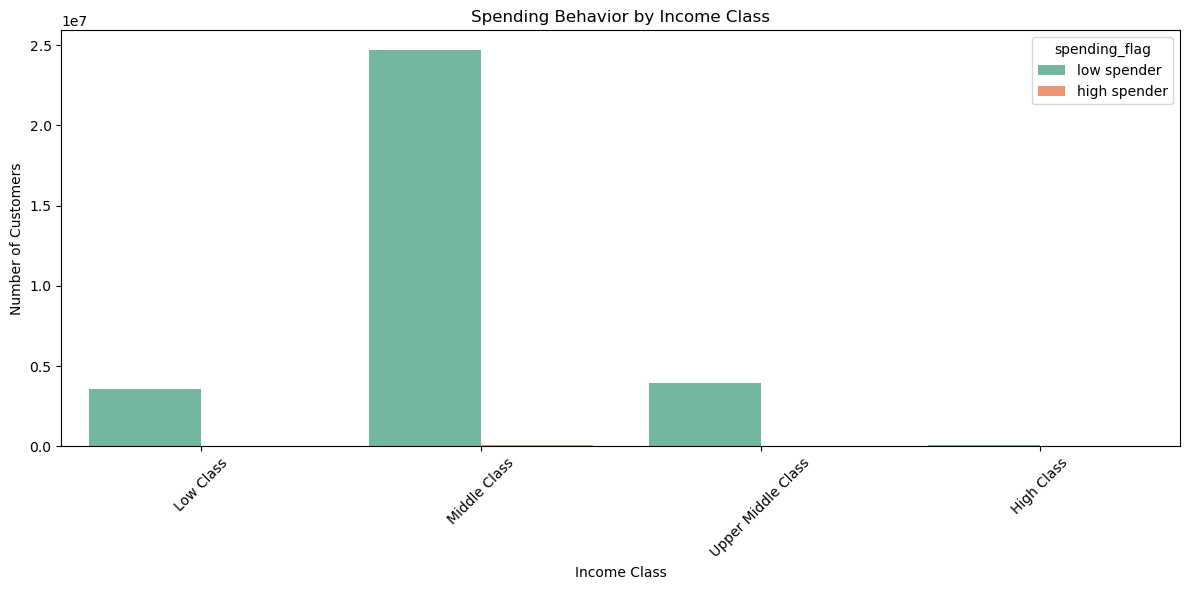

In [153]:
plt.figure(figsize=(12, 6))
bar_income_spending = sns.countplot(data=df_income_spending, x='income_class', hue='spending_flag', palette='Set2')
plt.xlabel("Income Class")
plt.ylabel("Number of Customers")
plt.title("Spending Behavior by Income Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

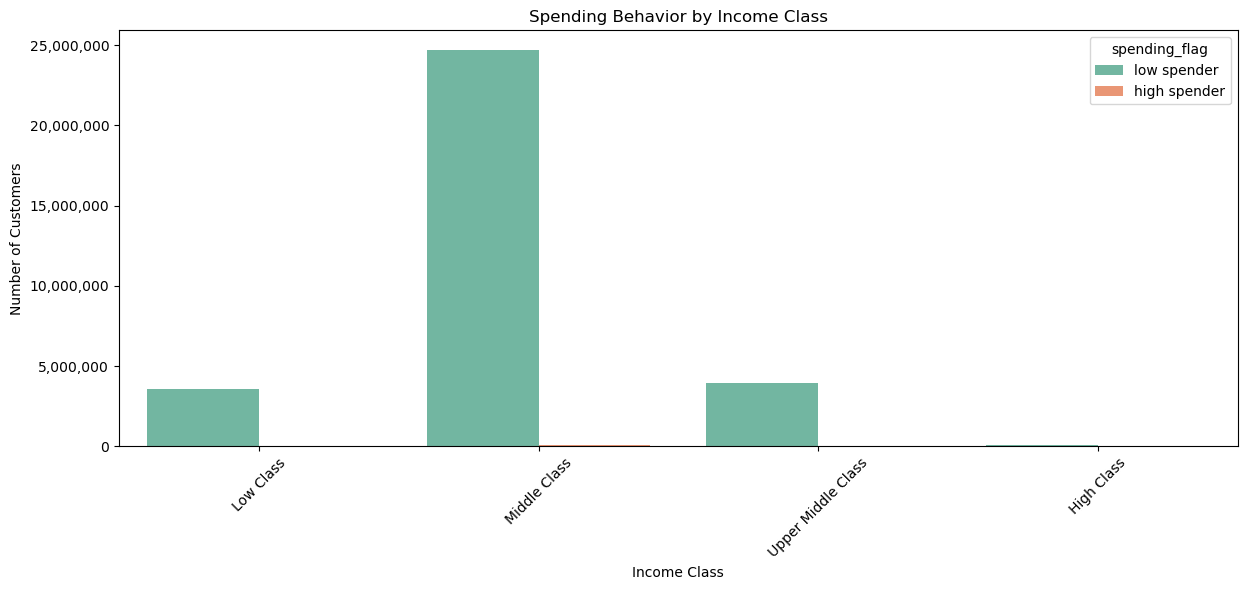

In [154]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_income_spending.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
bar_income_spending.figure

In [155]:
# Exporting the customer profile bar chart
bar_income_spending.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'income and spending.png'), dpi=300, bbox_inches='tight')

#### 3- Top 5 Products

In [157]:
# Counting the number of products ordered in each department.
df_product_department = df.groupby('department_id')['product_name'].value_counts().reset_index(name='count')

In [158]:
# filtering the top 5 best performing products
df_product_department_1 = df_product_department.head(5)

In [159]:
df_product_department_1

,department_id,product_name,count
0,1,Blueberries,55946
1,1,Organic Broccoli Florets,32887
2,1,Organic Whole Strawberries,31445
3,1,Frozen Organic Wild Blueberries,29905
4,1,Pineapple Chunks,24950


Text(0.5, 1.0, 'Top 5 Products')

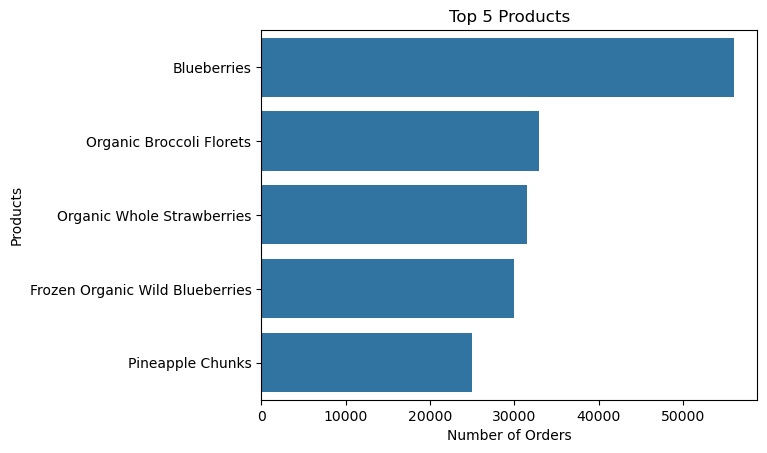

In [161]:
# Visualizing the top 5 products
bar_top_5_products = sns.barplot(data = df_product_department_1, x = 'count', y = 'product_name')
plt.ylabel("Products")
plt.xlabel("Number of Orders")
plt.title("Top 5 Products")

In [162]:
# Exporting the bar chart
bar_top_5_products.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'top 5 products.png'), dpi=300, bbox_inches='tight')

#### 4- Family Status Profile

In [43]:
df.groupby('family_status')['prices'].sum()

family_status
divorced/widowed                     21653519.3
living with parents and siblings     12113967.7
married                             177523993.0
single                               41516080.0
Name: prices, dtype: float64

In [44]:
df_family_status_spending = df.groupby('family_status')['prices'].sum().reset_index()

In [45]:
df_family_status_spending

,family_status,prices
0,divorced/widowed,21653519.3
1,living with parents and siblings,12113967.7
2,married,177523993.0
3,single,41516080.0


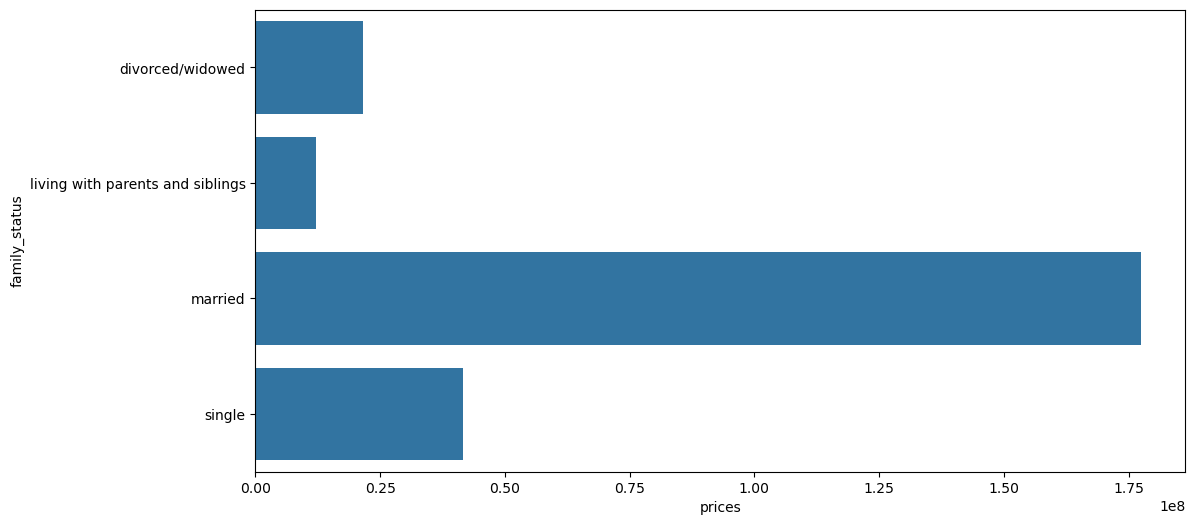

In [46]:
# Visualizing family status and spending
plt.figure(figsize=(12, 6))
bar_family_status_spending = sns.barplot(data=df_family_status_spending, x='prices', y='family_status')

In [47]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_family_status_spending.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

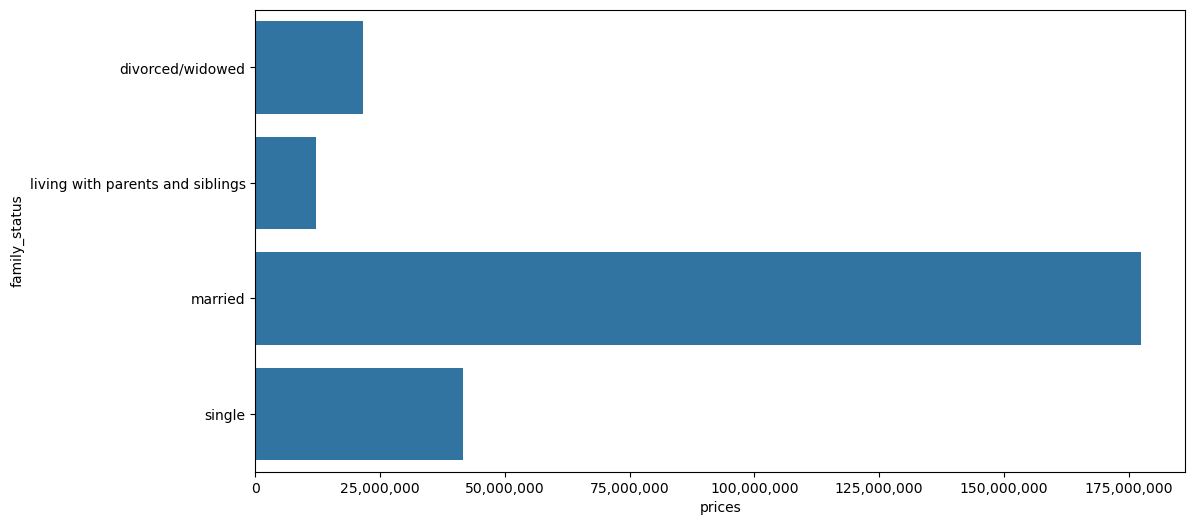

In [48]:
bar_family_status_spending.figure

### Final Customer Profiling

#### Single Adult: Age 20–40 = 0 dependents¶
#### Young Parent: Age 20–35 = =>1 dependents
#### Middle-Aged Parent: Age 36–55 = =>1 dependents
#### Elder Customer: Age 60+, => 0 dependents
#### Weekend Shopper: Orders mostly on weekends

In [80]:
# Creating a custom user defined filter
def customer_profile(row):
    age = row['age']
    income = row['income']
    dependents = row['number_of_dependants']
    dept = row['department_id']
    day = row['order_day_of_week']
    hour = row['order_hour_of_day']
    if age < 36 and dependents >= 1:
        return 'Young Parent'
    elif 36 <= age <= 55 and dependents >= 1:
        return 'Middle-Aged Parent'
    elif age < 41 and dependents == 0:
        return 'Single Adult'
    elif age >= 60:
        return 'Elder Customer'
    elif day in [5,6]:
        return 'Weekend Shopper'
    else:
        return 'Others'

In [81]:
# Applying the filter into our dataframe
df['customer_profile'] = df.apply(customer_profile, axis=1)

In [82]:
# calculating the frequency of customers in each profile
df['customer_profile'].value_counts()

customer_profile
Elder Customer        11075424
Middle-Aged Parent     7645179
Young Parent           6875254
Single Adult           2908782
Others                 2868753
Weekend Shopper        1055693
Name: count, dtype: int64

In [83]:
# assigning the customer_profile column to df_customer_profile
df_customer_profile = df[['customer_profile']]

Text(0.5, 1.0, 'Customer profile')

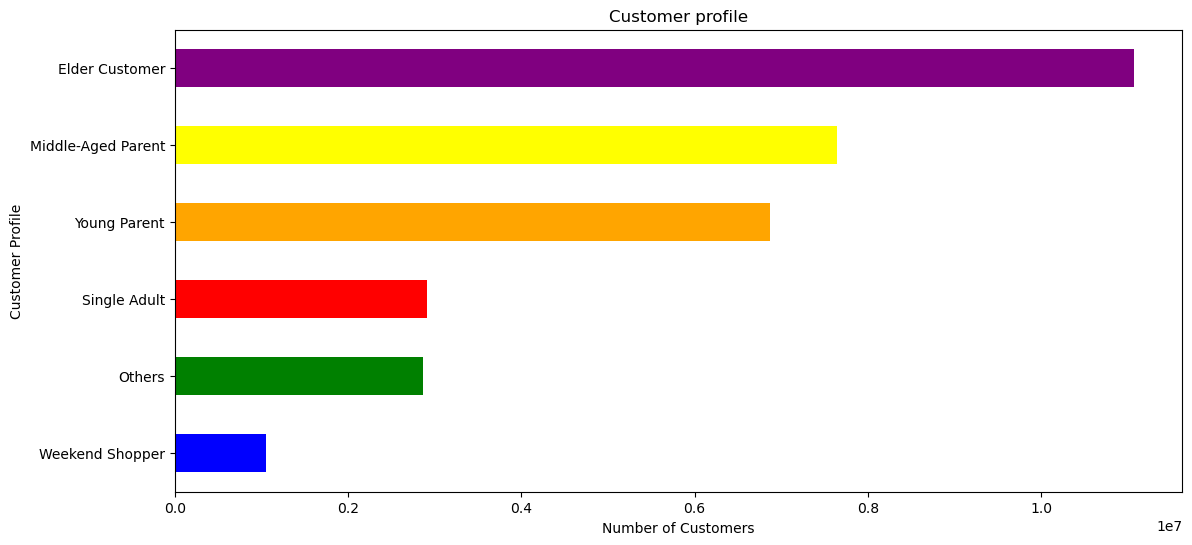

In [90]:
# visualizing customer profiles
bar_customer_profile = df_customer_profile['customer_profile'].value_counts().sort_values(ascending= True).plot.barh(color=['blue','green','red', 'orange', 'yellow', 'purple'], figsize=(13,6))
plt.ylabel("Customer Profile")
plt.xlabel("Number of Customers")
plt.title("Customer profile")

In [54]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_customer_profile.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

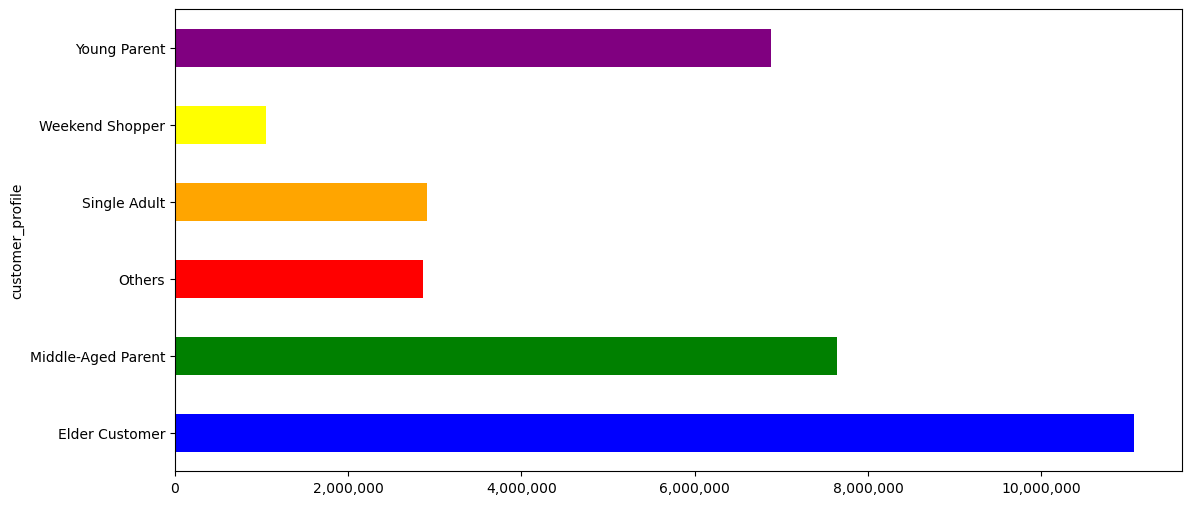

In [55]:
bar_customer_profile.figure

In [56]:
# Exporting the customer profile bar chart
bar_customer_profile.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'Customer_profile_chart.png'), dpi=300, bbox_inches='tight')

##### Customer Spending Behavior

In [114]:
df_customer_spending_behavior = df.groupby('customer_profile')['prices'].sum().sort_values(ascending=True)

Text(0.5, 1.0, 'Spending by Customer Profile')

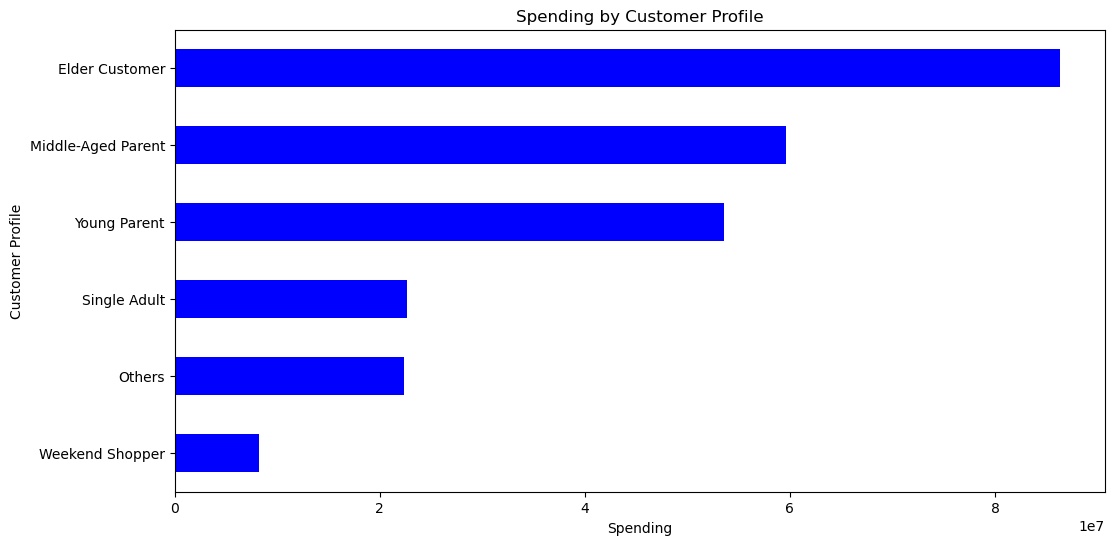

In [116]:
# visualizing customer profiles
bar_customer_spending_behavior = df_customer_spending_behavior.plot(kind='barh', figsize=(12, 6), color='blue')
plt.xlabel("Spending")
plt.ylabel("Customer Profile")
plt.title("Spending by Customer Profile")

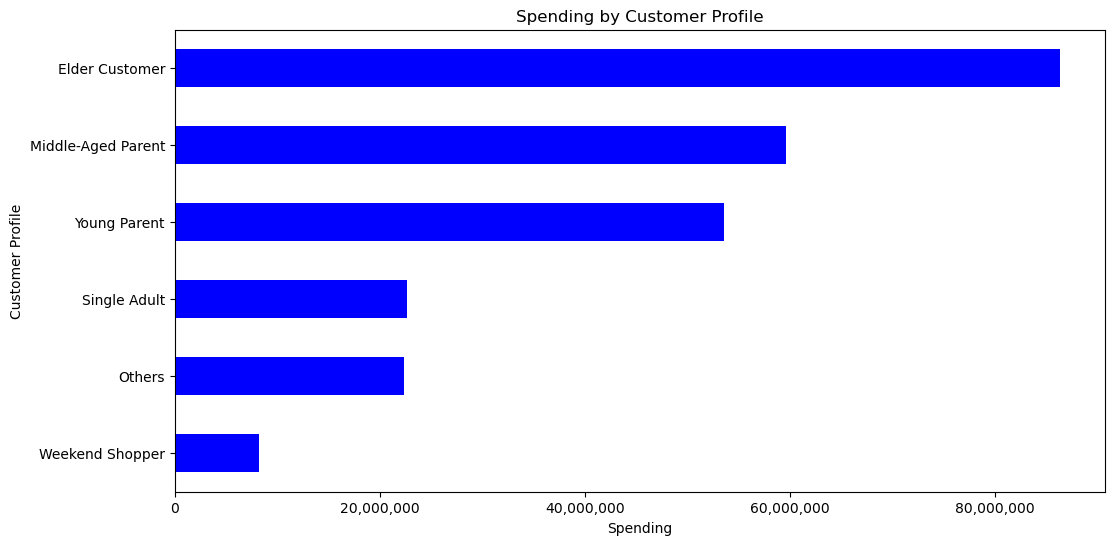

In [117]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_customer_spending_behavior.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
bar_customer_spending_behavior.figure

In [118]:
# Exporting the chart
bar_customer_spending_behavior.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profile_behavior.png'), dpi=300, bbox_inches='tight')

#### Extra Analysis

In [57]:
# Calling the min, max, mean of Number of orders and prices
df.groupby('customer_profile').agg({'order_number': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

order_number                prices                
                            min       mean max    min      mean   max
customer_profile                                                     
Elder Customer                1  17.115132  99    1.0  7.800041  25.0
Middle-Aged Parent            1  17.155986  99    1.0  7.796165  25.0
Others                        1  17.294770  99    1.0  7.790813  25.0
Single Adult                  1  17.037894  99    1.0  7.785009  25.0
Weekend Shopper               1  17.338879  99    1.0  7.818836  25.0
Young Parent                  1  17.120818  99    1.0  7.791221  25.0

In [58]:
# Grouping customers based on differenct departments
df.groupby('customer_profile')['department'].value_counts().reset_index()

,customer_profile,department,count
0,Elder Customer,produce,3240599
1,Elder Customer,dairy eggs,1841758
2,Elder Customer,snacks,982320
3,Elder Customer,beverages,923719
4,Elder Customer,frozen,768113
...,...,...,...
121,Young Parent,alcohol,34070
122,Young Parent,pets,20671
123,Young Parent,missing,14896
124,Young Parent,other,7779


In [59]:
# creating a crosstab of customer profile and department ids
df_crosstab = pd.crosstab(df['department'], df['customer_profile'])

In [60]:
df_crosstab

customer_profile,Elder Customer,Middle-Aged Parent,Others,Single Adult,Weekend Shopper,Young Parent
department,,,,,,
alcohol,50698,34761,14103,14047,6064,34070
babies,142912,104122,37668,38871,13098,87131
bakery,401275,276964,104369,106143,38850,249186
beverages,923719,632323,240793,242278,88180,560866
breakfast,241472,167534,63058,63246,22383,152954
bulk,11803,8136,3030,2960,1113,7531
canned goods,363738,251198,93762,96179,35027,228154
dairy eggs,1841758,1273822,476047,486266,174437,1156559
deli,359502,246409,93792,95109,33772,222665


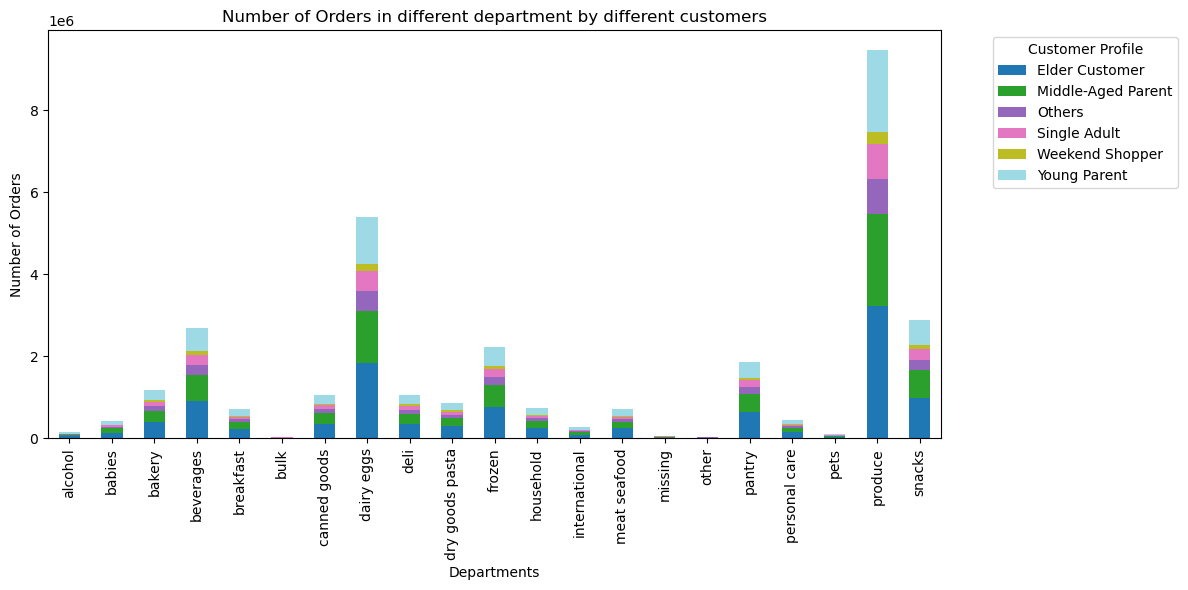

In [61]:
# Visualizing the crosstab of Customers vs departments
bar_customer_department = df_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20')
plt.title("Number of Orders in different department by different customers")
plt.xlabel("Departments")
plt.ylabel("Number of Orders")
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [62]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_customer_department.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

In [63]:
# Exporting the chart
bar_customer_department.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profile_vs_department.png'), dpi=300, bbox_inches='tight')

#### Profile of customers in different regions

In [64]:
# creating a crosstab of customer profile and regions
df_crosstab_region = pd.crosstab(df['customer_profile'], df['regions'])

In [65]:
df_crosstab_region

regions,Midwest,Northeast,South,West
customer_profile,,,,
Elder Customer,2571103,1974696,3688390,2841235
Middle-Aged Parent,1815423,1345572,2526636,1957548
Others,685184,500797,937686,745086
Single Adult,675673,513322,991485,728302
Weekend Shopper,253254,184396,343776,274267
Young Parent,1601913,1208720,2311848,1752773


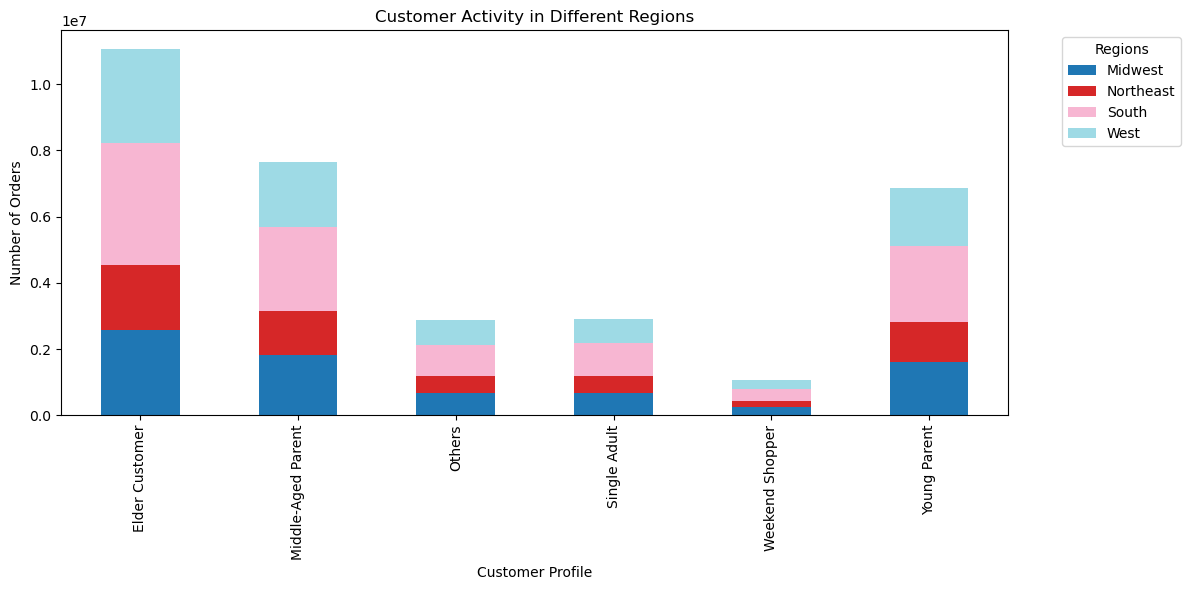

In [66]:
# Creating a stacked barchart of the customer profile and regions
bar_customer_region = df_crosstab_region.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20')
plt.title("Customer Activity in Different Regions")
plt.xlabel("Customer Profile")
plt.ylabel("Number of Orders")
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [67]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_customer_region.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

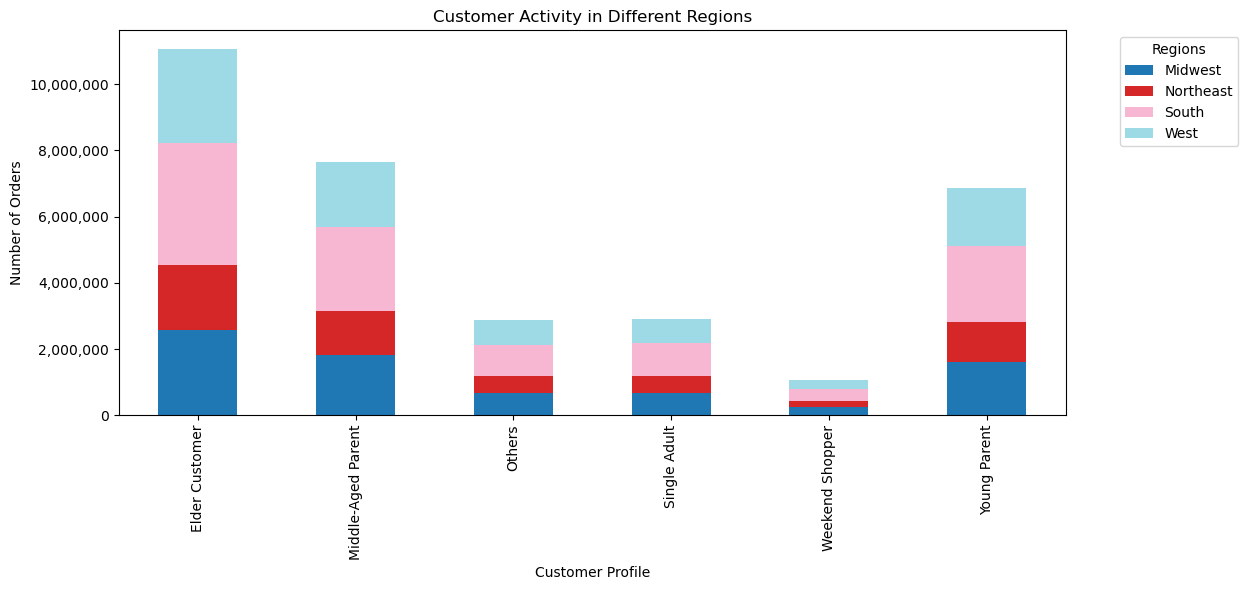

In [68]:
bar_customer_region.figure

In [69]:
# Exporting the chart
bar_customer_region.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profile_vs_regions.png'), dpi=300, bbox_inches='tight')

In [70]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'department', 'regions', 'age_group',
       'income_class', 'customer_profile'],
      dtype='object')

### Other Derived Data

#### 1- Product Price Range column
#### low-range product: price below 5
#### Mid-range product: price above or equal to 5 and below 15
#### High-range product: Price above or equal to 15

In [174]:
df.loc[df['prices'] <5, 'price_range'] = 'low-range product'

In [175]:
df.loc[(df['prices'] >=5) & (df['prices']<15), 'price_range'] = 'mid-range product'

In [176]:
df.loc[df['prices']>=15, 'price_range']= 'high-range product'

In [177]:
df['price_range'].value_counts()

price_range
mid-range product     22018789
low-range product      9900480
high-range product      509816
Name: count, dtype: int64

In [169]:
df_price_range = df[['price_range']]

Text(0.5, 1.0, 'Number of orders based on Price Range')

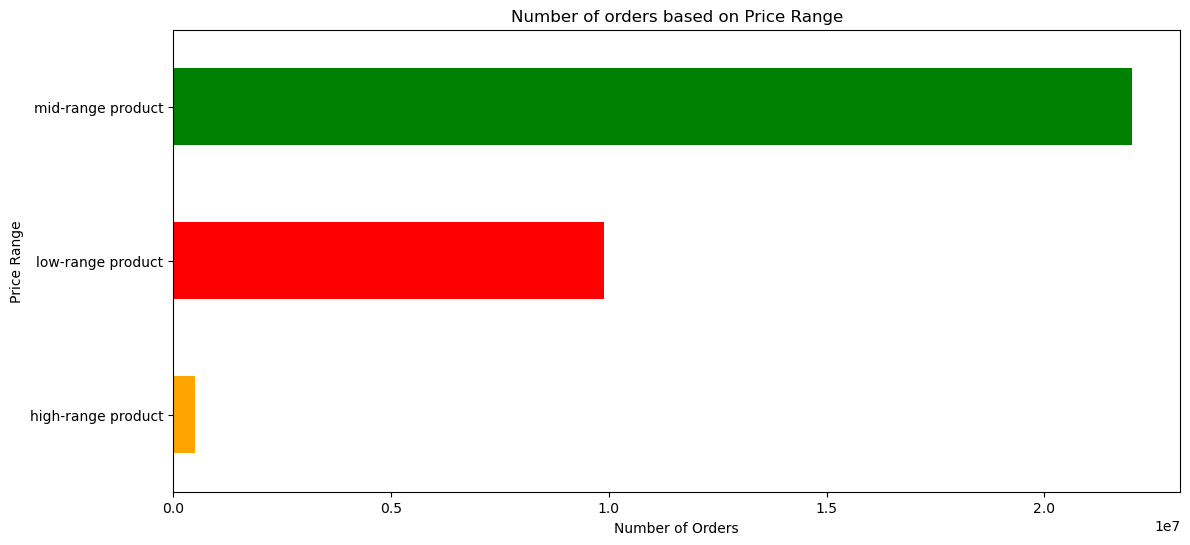

In [178]:
# Visualizing busiest days
bar_price_range = df_price_range['price_range'].value_counts().sort_index().plot.barh(color=['Orange','red','green'], figsize=(13,6))
plt.ylabel("Price Range")
plt.xlabel("Number of Orders")
plt.title("Number of orders based on Price Range")

In [179]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_price_range.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

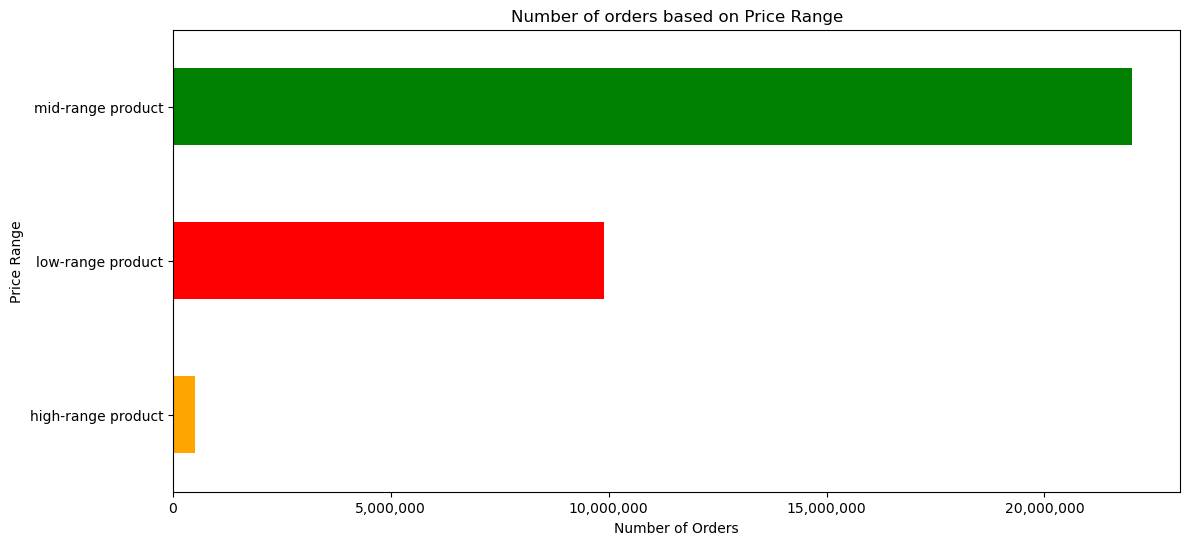

In [180]:
bar_price_range.figure

In [181]:
# Exporting the chart
bar_price_range.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'price_range.png'), dpi=300, bbox_inches='tight')

#### 2- Busiest Days column
#### Busiest Day: 0 aka Saturday
#### Second Busiest: 1 aka Sunday
#### Slowest day: 4 aka Wednesday
#### Second Slowest day: Tuesday
#### Average day: Other days

In [79]:
# checking busiest days
df['order_day_of_week'].value_counts()

order_day_of_week
0    6208779
1    5664898
6    4499643
2    4217041
5    4208734
3    3843427
4    3786563
Name: count, dtype: int64

In [178]:
# creating new data based on days_of_week's busiest and least busiest days called result_busiest
result_busiest = []

for value in df['order_day_of_week']:
    if value == 0:
        result_busiest.append ('Busiest Day')
    elif value == 1:
        result_busiest.append ('Second Busiest')
    elif value == 4:
        result_busiest.append ('Slowest Day')
    elif value == 3:
        result_busiest.append ('Second Slowest')
    else:
        result_busiest.append ('Average Day')

In [179]:
df['Busiest_Days'] = result_busiest

In [180]:
df['Busiest_Days'].value_counts()

Busiest_Days
Average Day       12925418
Busiest Day        6208779
Second Busiest     5664898
Second Slowest     3843427
Slowest Day        3786563
Name: count, dtype: int64

#### Creating a new column based on order_day_of_week with actual names of the days
#### Busiest days based on number of orders

In [181]:
df.loc[df['order_day_of_week'] == 0, 'day_of_week'] = 'Saturday'
df.loc[df['order_day_of_week'] == 1, 'day_of_week'] = 'Sunday'
df.loc[df['order_day_of_week'] == 2, 'day_of_week'] = 'Monday'
df.loc[df['order_day_of_week'] == 3, 'day_of_week'] = 'Tuesday'
df.loc[df['order_day_of_week'] == 4, 'day_of_week'] = 'Wednesday'
df.loc[df['order_day_of_week'] == 5, 'day_of_week'] = 'Thursday'
df.loc[df['order_day_of_week'] == 6, 'day_of_week'] = 'Friday'

In [182]:
df['day_of_week'].value_counts()

day_of_week
Saturday     6208779
Sunday       5664898
Friday       4499643
Monday       4217041
Thursday     4208734
Tuesday      3843427
Wednesday    3786563
Name: count, dtype: int64

In [110]:
df_busiest_days = df[['day_of_week']]

Text(0.5, 1.0, 'Busiest Days of the week Based on Number of Orders')

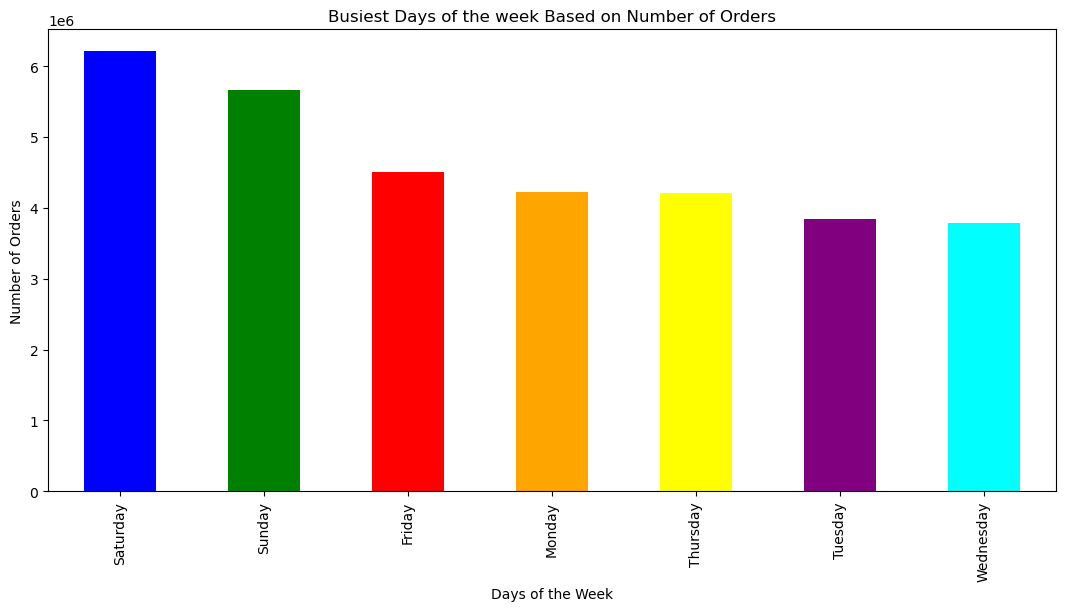

In [193]:
# Visualizing busiest days
bar_busiest_days = df_busiest_days['day_of_week'].value_counts().sort_values(ascending=False).plot.bar(color=['blue','green','red', 'orange', 'yellow', 'purple', 'cyan'], figsize=(13,6))
plt.ylabel("Number of Orders")
plt.xlabel("Days of the Week")
plt.title("Busiest Days of the week Based on Number of Orders")

In [194]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_busiest_days.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

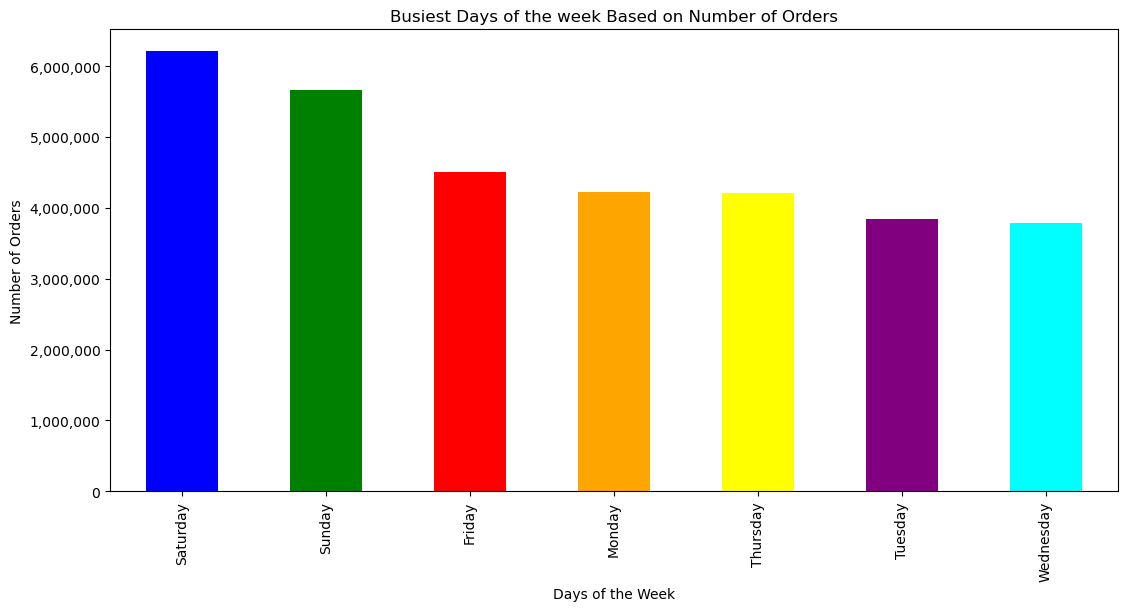

In [195]:
bar_busiest_days.figure

In [196]:
# Exporting the chart
bar_busiest_days.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'busiest_days.png'), dpi=300, bbox_inches='tight')

#### Busiest days based on revenue

In [137]:
df_busiest_days_revenue = df.groupby('day_of_week').agg({'prices': 'sum'})

In [207]:
df_busiest_days_revenue_sort = df_busiest_days_revenue.sort_values('prices', ascending=False)

C:\Users\faisa\AppData\Local\Temp\ipykernel_13812\1323149266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_busiest_days_revenue = sns.barplot(data=df_busiest_days_revenue_sort, x='day_of_week', y='prices', palette = color)


Text(0.5, 1.0, 'Busiest Days of the week Based on Revenue')

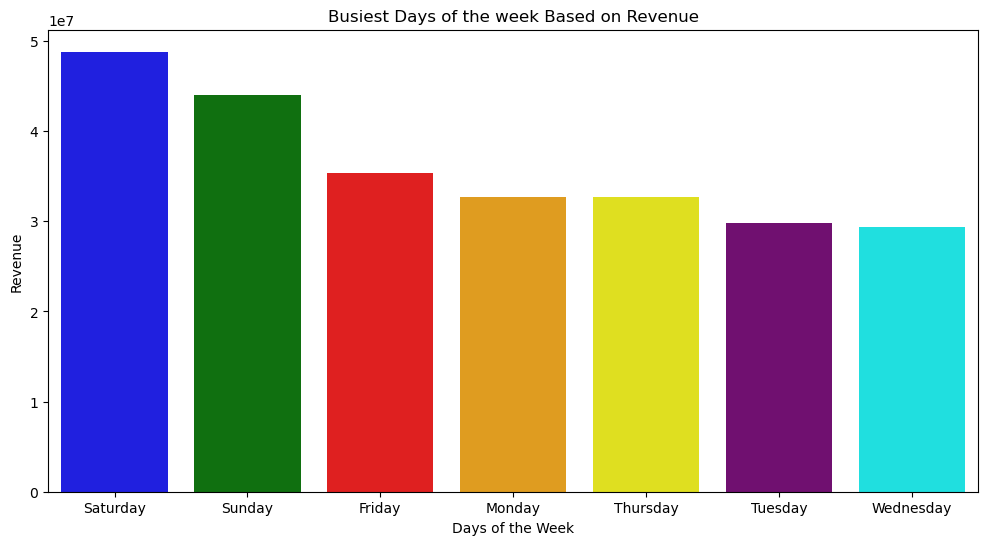

In [208]:
plt.figure(figsize=(12, 6))
color=['blue','green','red', 'orange', 'yellow', 'purple', 'cyan']
bar_busiest_days_revenue = sns.barplot(data=df_busiest_days_revenue_sort, x='day_of_week', y='prices', palette = color)
plt.ylabel("Revenue")
plt.xlabel("Days of the Week")
plt.title("Busiest Days of the week Based on Revenue")

In [209]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_busiest_days_revenue.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

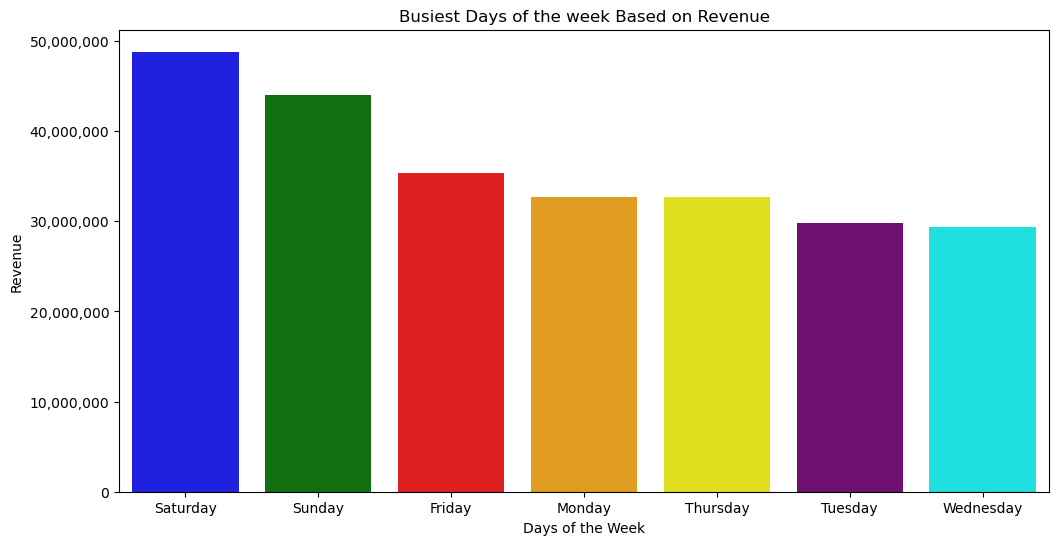

In [210]:
bar_busiest_days_revenue.figure

In [211]:
# Exporting the chart
bar_busiest_days_revenue.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'busiest_days_revenue.png'), dpi=300, bbox_inches='tight')

#### 2- Busiest Hours column
#### Most Orders: following hours; 10,11,14,15,13,12,16,9
#### Average Orders: following hours; 17,8,18,19,20,7,21,22
#### Few Orders: following hours; 23,6,0,1,5,2,4,3

In [86]:
# calling frequency of busiest hours of the day
df['order_hour_of_day'].value_counts()

order_hour_of_day
10    2763963
11    2738139
14    2691155
15    2664096
13    2662888
12    2620372
16    2537011
9     2456300
17    2089071
8     1719697
18    1637646
19    1259153
20     976861
7      891797
21     796253
22     634671
23     402568
6      290727
0      218915
1      115769
5       88040
2       69416
4       53273
3       51304
Name: count, dtype: int64

In [183]:
# creating new data based on busiest hours of the day
busiest_hours = []
for value in df['order_hour_of_day']:
        if value in [10,11,14,15,13,12,16,9]:
            busiest_hours.append ('Most Orders')
        elif value in [17,8,18,19,20,7,21,22]:
            busiest_hours.append ('Average Orders')
        elif value in [23,6,0,1,5,2,4,3]:
            busiest_hours.append ('Few Orders')
        else:
            busiest_hours.append ('NA')

In [184]:
# setting a new column based on busiest_hours data
df['busiest_hours'] = busiest_hours

In [185]:
# calling the frequency of orders based on new labels
df['busiest_hours'].value_counts()

busiest_hours
Most Orders       21133924
Average Orders    10005149
Few Orders         1290012
Name: count, dtype: int64

In [90]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'department', 'regions', 'age_group',
       'income_class', 'customer_profile', 'price_range', 'Busiest_Days',
       'busiest_hours'],
      dtype='object')

In [149]:
df_busiest_hours = df[['order_hour_of_day']]

Text(0.5, 1.0, 'Distribution of Orders by Hour')

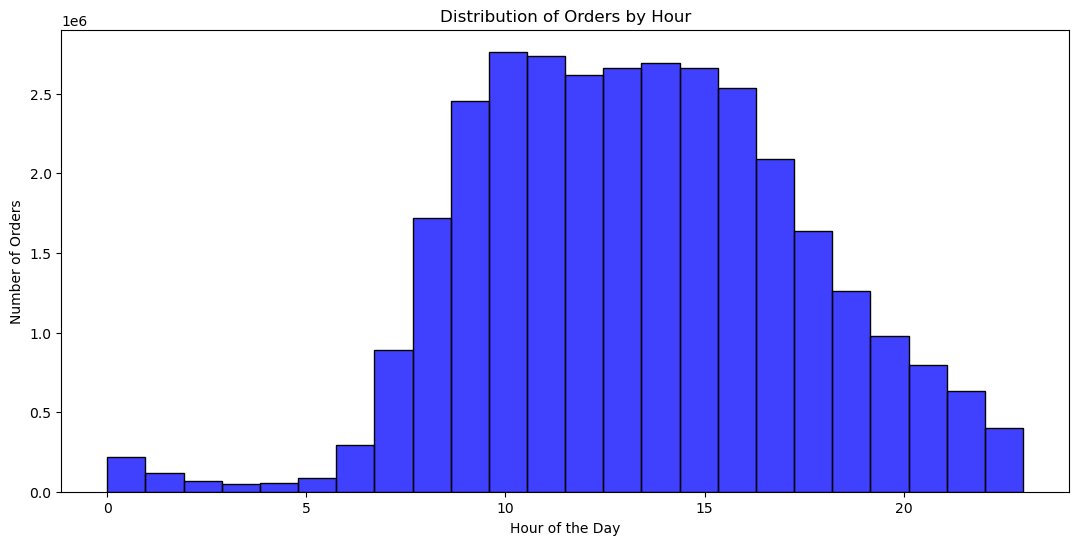

In [218]:
# Visualizing busiest days
plt.figure(figsize=(13, 6))
hist_busiest_hours = sns.histplot(data=df_busiest_hours, x='order_hour_of_day', bins=24, color='blue')

plt.ylabel("Number of Orders")
plt.xlabel("Hour of the Day")
plt.title("Distribution of Orders by Hour")

In [219]:
# removing the sceintific notation at the top to show actual numbers for better readability
hist_busiest_hours.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

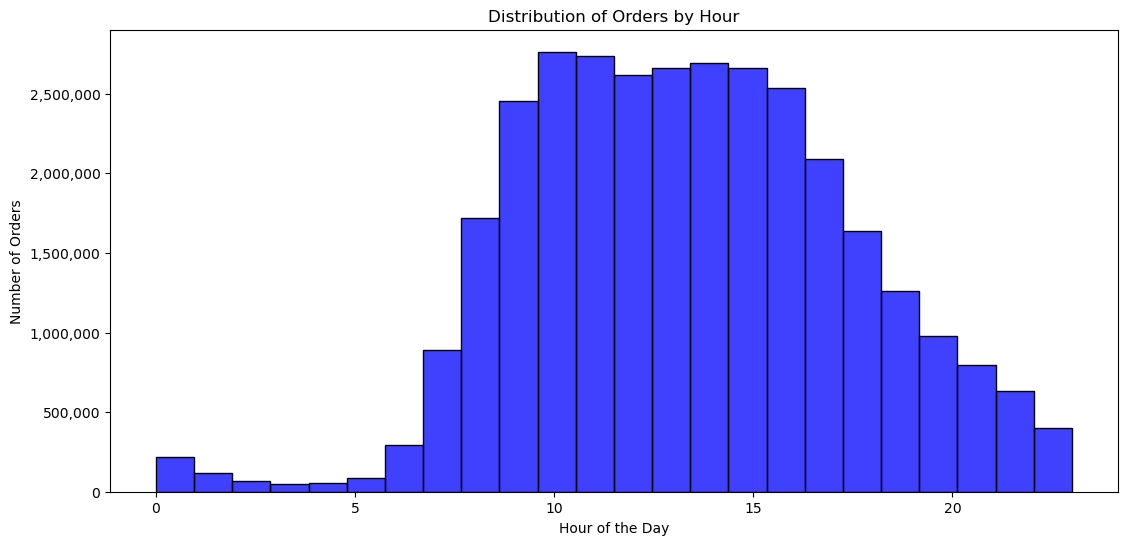

In [220]:
hist_busiest_hours.figure

In [221]:
# Exporting the chart
hist_busiest_hours.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'busiest_hours_hist.png'), dpi=300, bbox_inches='tight')

#### Busiest Hours based on revenue

In [160]:
df_busiest_hours_revenue = df.groupby('order_hour_of_day').agg({'prices': 'sum'})

In [212]:
plt.figure(figsize=(12, 6))
bar_busiest_hours_revenue = sns.barplot(data=df_busiest_hours_revenue, x='order_hour_of_day', y='prices', palette= ['blue'])
plt.ylabel("Revenue")
plt.xlabel("Hour of Day")
plt.title("Busiest Hour of the day Based on Revenue")

AttributeError: module 'seaborn' has no attribute 'hist'

<Figure size 1200x600 with 0 Axes>

In [165]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_busiest_hours_revenue.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

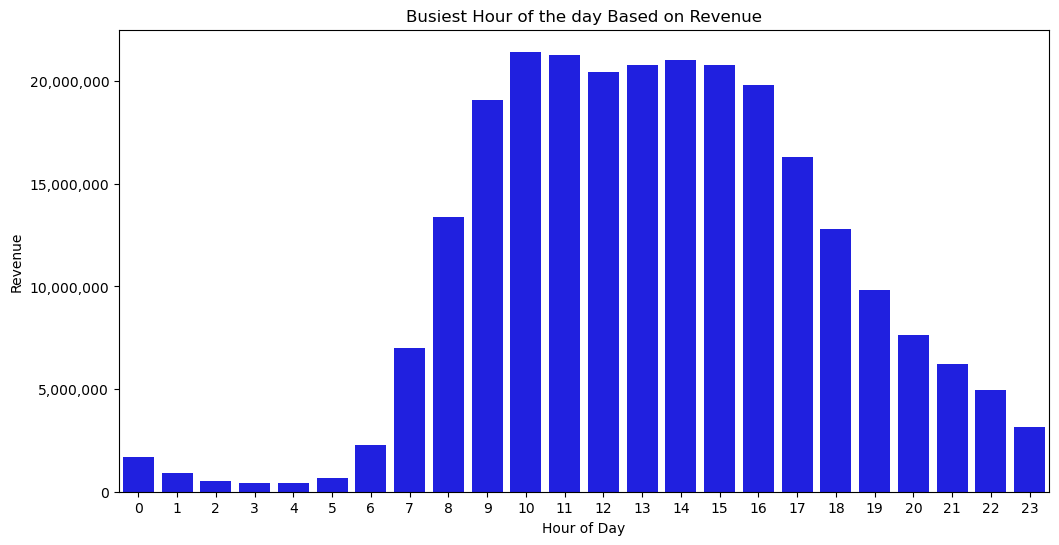

In [166]:
bar_busiest_hours_revenue.figure

In [167]:
# Exporting the chart
bar_busiest_hours_revenue.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'busiest_hours_revenue.png'), dpi=300, bbox_inches='tight')

#### Departments VS Orders

In [185]:
df_department_orders = df[['department']]

Text(0.5, 1.0, 'Performance of Each department based on number of orders')

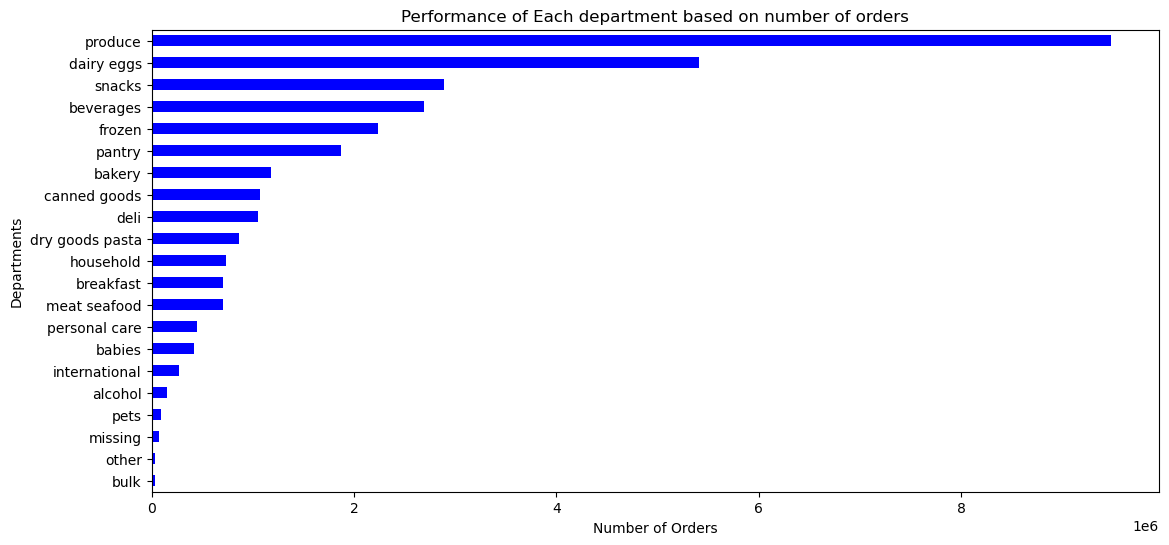

In [202]:
# Visualizing busiest days
bar_department_orders = df_department_orders['department'].value_counts().sort_values(ascending=True).plot.barh(color=['blue'], figsize=(13,6))
plt.ylabel("Departments")
plt.xlabel("Number of Orders")
plt.title("Performance of Each department based on number of orders")

In [203]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_department_orders.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

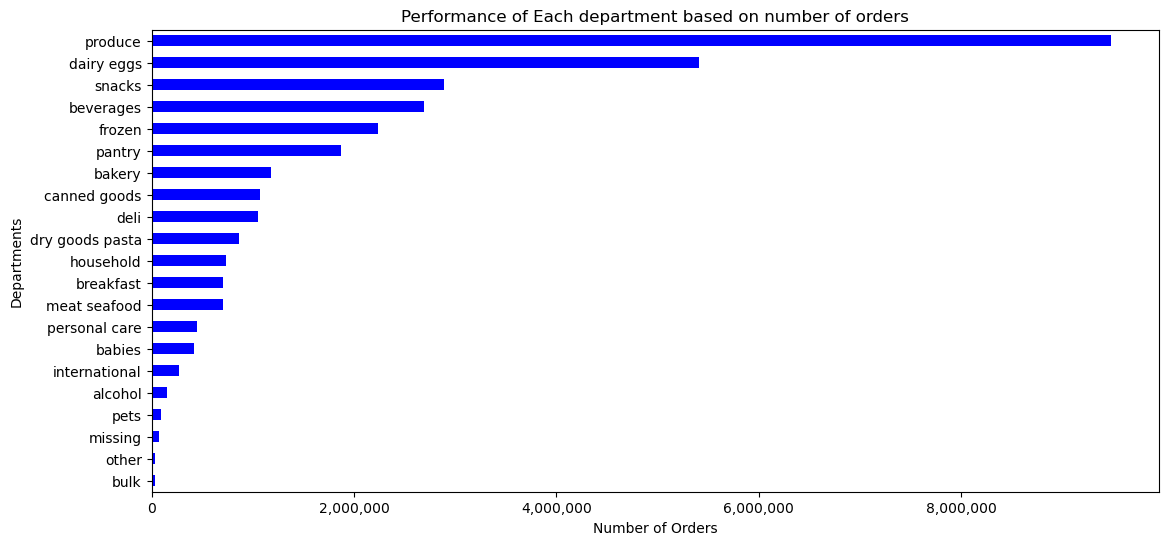

In [204]:
bar_department_orders.figure

In [205]:
# Exporting the chart
bar_department_orders.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'department_orders.png'), dpi=300, bbox_inches='tight')

#### Regions visualization

In [5]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'department'],
      dtype='object')

### Loyalty Analysis

In [14]:
# creating max orders column of the customers.
df['max_orders'] = df.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\faisa\AppData\Local\Temp\ipykernel_1764\2533898242.py:2: FutureWarning: The provided callable <function max at 0x000002C8AB4AC4A0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['max_orders'] = df.groupby(['user_id'])['order_number'].transform(np.max)


In [15]:
# creating loyalty tag using .loc function
df.loc[df['max_orders']> 40, 'loyalty_tag'] = 'loyal_customer'

In [18]:
df.loc[(df['max_orders']<=40) & (df['max_orders']>10), 'loyalty_tag'] = 'average_customer'

In [20]:
df.loc[df['max_orders']<=10, 'loyalty_tag'] = 'new_customer'

In [21]:
df['loyalty_tag'].value_counts(dropna=False)

loyalty_tag
average_customer    15888429
loyal_customer      10292407
new_customer         6248249
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Loyalty chart')

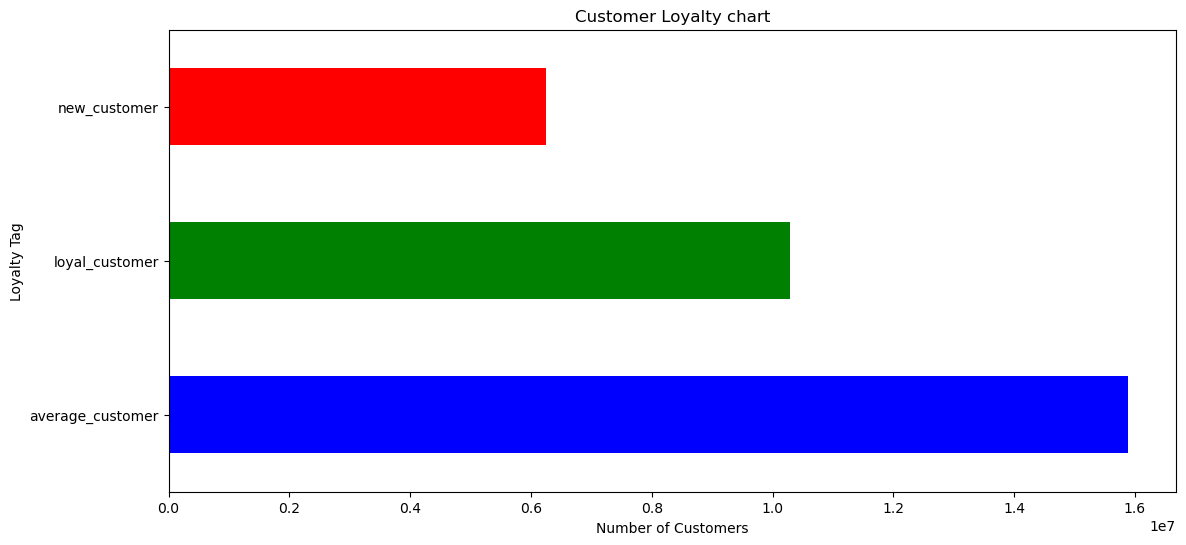

In [35]:
# Visualizing loyalty tag
bar_loyal_customers = df['loyalty_tag'].value_counts().sort_values(ascending=False).plot.barh(color=['blue','green','red', 'orange', 'yellow', 'purple', 'cyan'], figsize=(13,6))
plt.ylabel("Loyalty Tag")
plt.xlabel("Number of Customers")
plt.title("Customer Loyalty chart")

In [36]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_loyal_customers.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

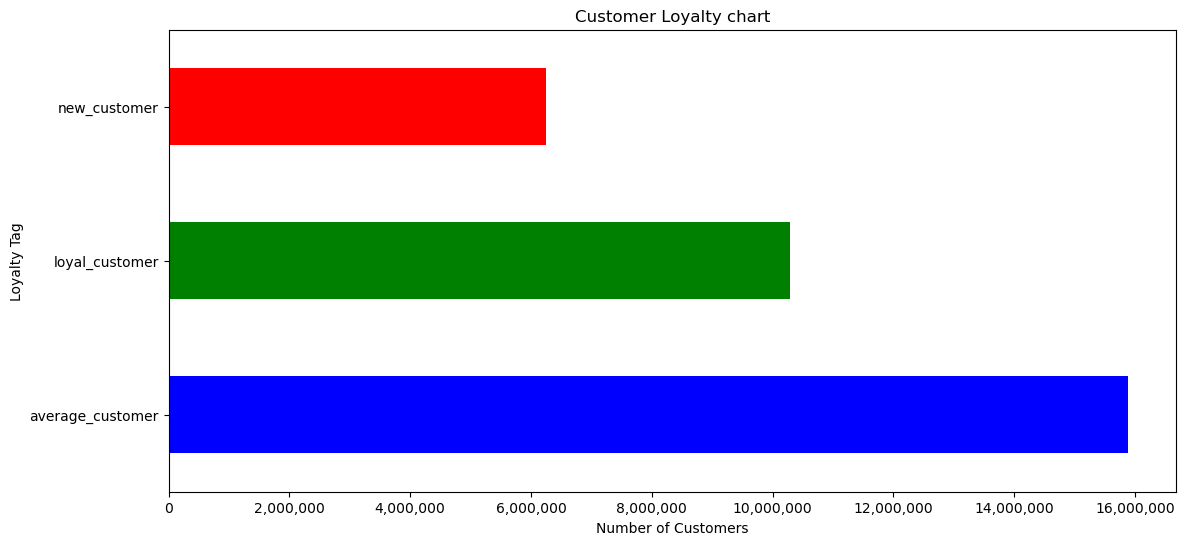

In [37]:
bar_loyal_customers.figure

In [38]:
# Exporting the chart
bar_loyal_customers.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'loyal_customers.png'), dpi=300, bbox_inches='tight')

In [41]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'department', 'regions', 'max_orders',
       'loyalty_tag'],
      dtype='object')

##### Busiest Hours vs loyalty

In [48]:
df_loyalty_hours = df.groupby(['loyalty_tag', 'order_hour_of_day']).size().reset_index(name='order_count')

Text(0.5, 1.0, 'Order behavior of different loyalty segment')

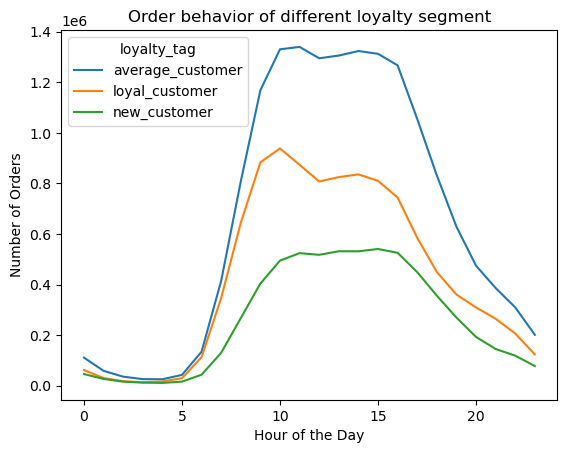

In [52]:
line_loyalty = sns.lineplot(data=df_loyalty_hours, x='order_hour_of_day', y='order_count', hue='loyalty_tag')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Order behavior of different loyalty segment")

In [53]:
# removing the sceintific notation at the top to show actual numbers for better readability
line_loyalty.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

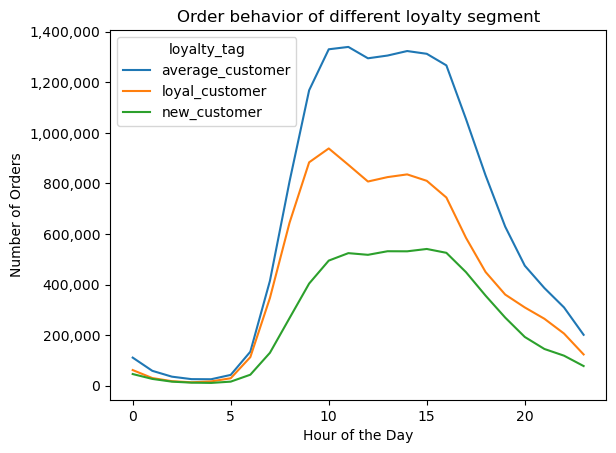

In [54]:
line_loyalty.figure

In [55]:
# Exporting the chart
line_loyalty.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'loyal_hours.png'), dpi=300, bbox_inches='tight')

##### Loyalty vs Days

In [56]:
df_loyalty_days = df.groupby(['loyalty_tag', 'order_day_of_week']).size().reset_index(name='order_count')

Text(0.5, 1.0, 'Order behavior of different loyalty segment')

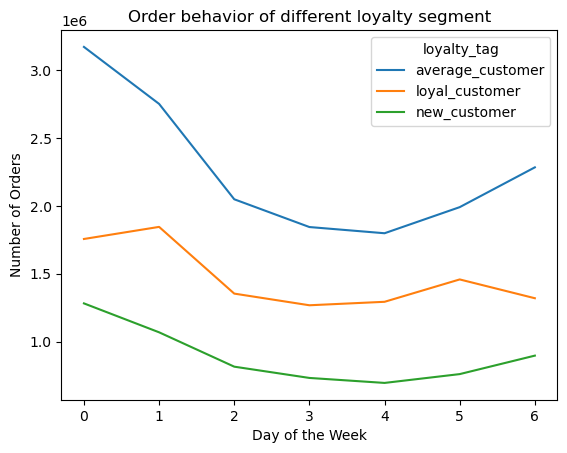

In [57]:
line_loyalty_days = sns.lineplot(data=df_loyalty_days, x='order_day_of_week', y='order_count', hue='loyalty_tag')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.title("Order behavior of different loyalty segment")

In [59]:
# removing the sceintific notation at the top to show actual numbers for better readability
line_loyalty_days.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

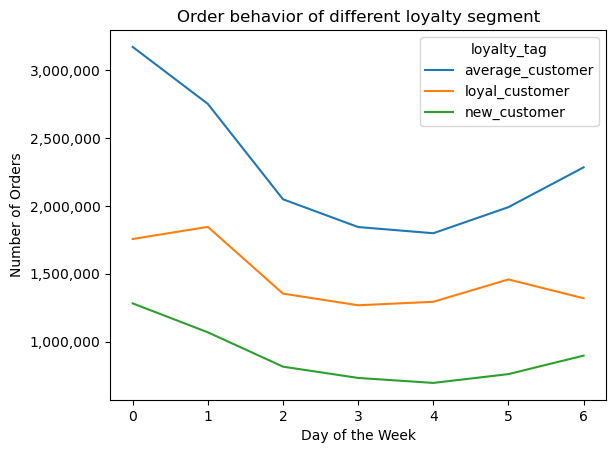

In [60]:
line_loyalty_days.figure

In [61]:
# Exporting the chart
line_loyalty_days.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'loyal_days.png'), dpi=300, bbox_inches='tight')

#### Customer Bahavior in different regions

In [76]:
df_loyalty_regions = df.groupby(['regions', 'loyalty_tag']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Customer Loyalty Distribution Across Regions')

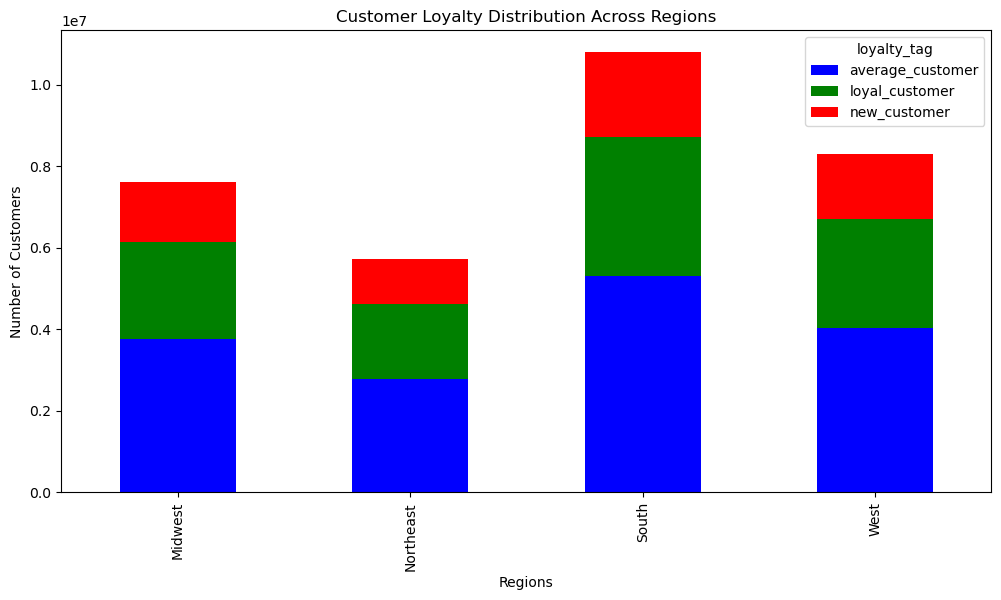

In [77]:
bar_loyalty_regions = df_loyalty_regions.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'green', 'red'])
plt.xlabel("Regions")
plt.ylabel("Number of Customers")
plt.title("Customer Loyalty Distribution Across Regions")

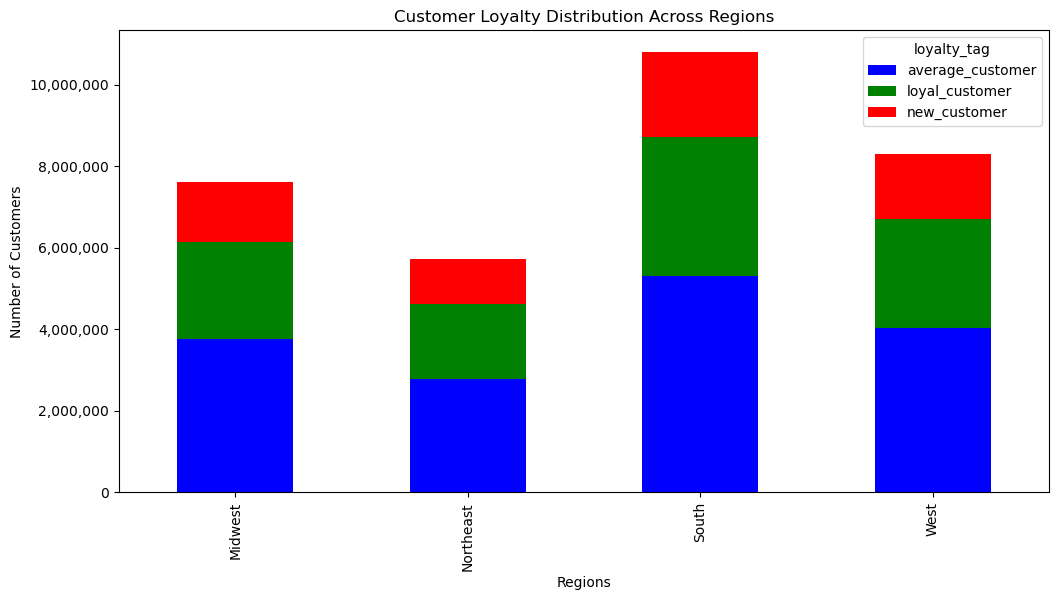

In [78]:
# removing the sceintific notation at the top to show actual numbers for better readability
bar_loyalty_regions.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
bar_loyalty_regions.figure

In [79]:
# Exporting the chart
bar_loyalty_regions.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'bar_loyalty_regions.png'), dpi=300, bbox_inches='tight')

In [186]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'department', 'regions', 'max_orders',
       'loyalty_tag', 'customer_profile', 'age_group', 'income_class',
       'average_spending', 'spending_flag', 'price_range', 'Busiest_Days',
       'day_of_week', 'busiest_hours'],
      dtype='object')

# Export Final Dataframe

In [187]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataframe1.0.pkl'))